# Experiment 9: Information Diffusion Models

**Aim**: To study information diffusion models through real-time case analysis (Simulation).

**Models**:
- **Independent Cascade Model (ICM)**: Probabilistic spread.
- **Linear Threshold Model**: Influence threshold.

**Simulation**:
We will simulate the **Independent Cascade Model** on a network to observe how information spreads from a set of seed nodes.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
def independent_cascade(G, seeds, probability=0.1):
    """
    Simulates one run of the Independent Cascade Model.
    """
    active = set(seeds)
    newly_active = set(seeds)
    history = [len(active)]
    
    while newly_active:
        current_new_active = set()
        for u in newly_active:
            # Try to infect neighbors
            neighbors = list(G.neighbors(u))
            for v in neighbors:
                if v not in active and v not in current_new_active:
                    if random.random() < probability:
                        current_new_active.add(v)
        
        active.update(current_new_active)
        newly_active = current_new_active
        history.append(len(active))
        
    return active, history


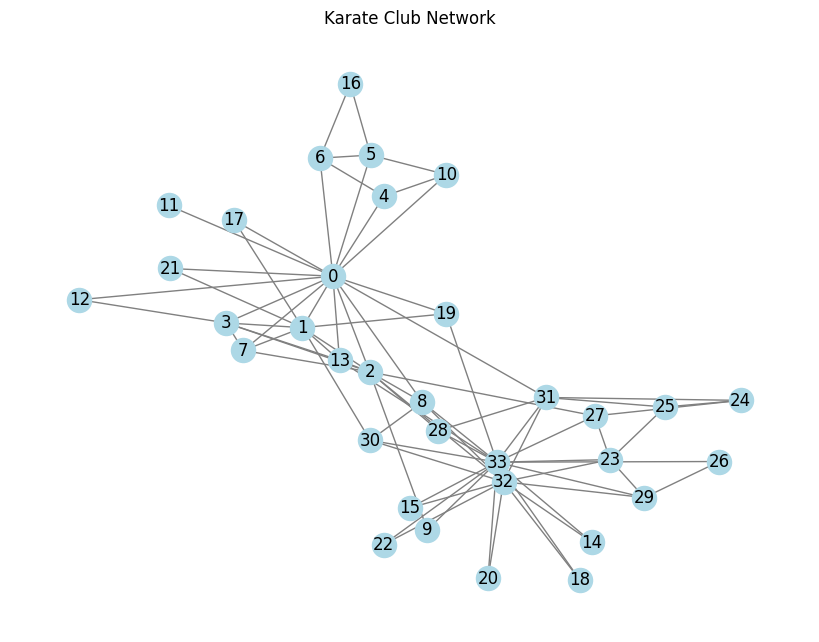

In [3]:
# Load a network (Zachary's Karate Club as a social network example)
G = nx.karate_club_graph()

# Visualization of Initial State
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Karate Club Network")
plt.show()


In [4]:
# Simulation
seeds = [0, 33] # The two main hubs (Instructor and Administrator)
prob = 0.2

final_active, spread_history = independent_cascade(G, seeds, probability=prob)

print(f"Initial Seeds: {seeds}")
print(f"Total nodes activated: {len(final_active)}")
print(f"Spread History (cumulative): {spread_history}")


Initial Seeds: [0, 33]
Total nodes activated: 15
Spread History (cumulative): [2, 7, 14, 15, 15]


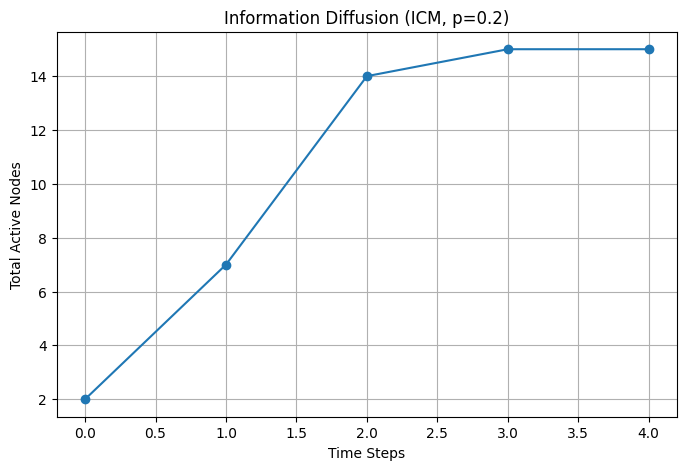

In [5]:
# Plot Spread over Time
plt.figure(figsize=(8, 5))
plt.plot(range(len(spread_history)), spread_history, marker='o', linestyle='-')
plt.xlabel("Time Steps")
plt.ylabel("Total Active Nodes")
plt.title(f"Information Diffusion (ICM, p={prob})")
plt.grid(True)
plt.show()


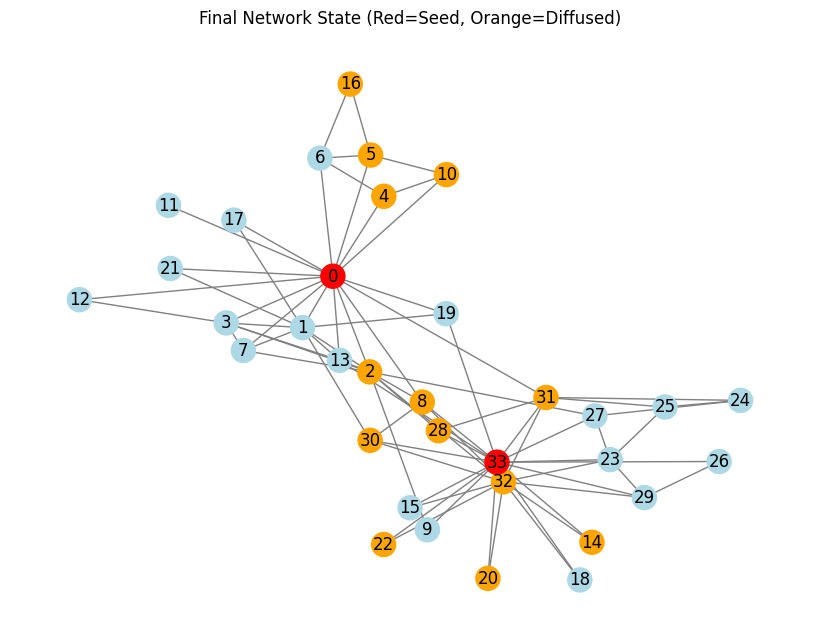

In [6]:
# Visualize Final State
node_colors = []
for node in G.nodes():
    if node in seeds:
        node_colors.append('red') # Seeds
    elif node in final_active:
        node_colors.append('orange') # Activated
    else:
        node_colors.append('lightblue') # Not Activated

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray')
plt.title("Final Network State (Red=Seed, Orange=Diffused)")
plt.show()


**Observation and Conclusion**:
1. **Seeds**: Choosing influential seeds (hubs like Node 0 and 33) maximizes spread.
2. **Probability**: Higher infection probability leads to faster and wider spread (Saturation).
3. **Dynamics**: The spread typically follows an S-curve (Logistic growth): slow start, rapid expansion, then plateau.
